# Assignment 1: Where does campaign money spend on?

In [9]:
#Importing Packages
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
%matplotlib inline

In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [18]:
#Reading CSV
all_house_senate_2010 = pd.read_csv('all_house_senate_2010.csv',low_memory=False)
all_house_senate_2012 = pd.read_csv('all_house_senate_2012.csv',low_memory=False)
all_house_senate_2014 = pd.read_csv('all_house_senate_2014.csv',low_memory=False)
all_house_senate_2016 = pd.read_csv('all_house_senate_2016.csv',encoding ='ISO-8859-1',low_memory=False)

In [20]:
#Converting Amount to floating number for graphical purpose
all_house_senate_2010['dis_amo'] = (all_house_senate_2010['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
all_house_senate_2012['dis_amo'] = (all_house_senate_2012['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
all_house_senate_2014['dis_amo'] = (all_house_senate_2014['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))
all_house_senate_2016['dis_amo'] = (all_house_senate_2016['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ).astype(float))

all_house_senate_2010.rename(columns={'dis_amo': 'Expenditure', 'can_nam': 'Candidate Name','can_off_sta': 'State'}, inplace=True)
all_house_senate_2012.rename(columns={'dis_amo': 'Expenditure', 'can_nam': 'Candidate Name','can_off_sta': 'State'}, inplace=True)
all_house_senate_2014.rename(columns={'dis_amo': 'Expenditure', 'can_nam': 'Candidate Name','can_off_sta': 'State'}, inplace=True)
all_house_senate_2016.rename(columns={'dis_amo': 'Expenditure', 'can_nam': 'Candidate Name','can_off_sta': 'State'}, inplace=True)

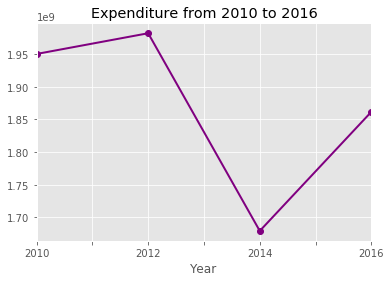

In [22]:
#Taking Election Year and Expenditure to another frame
all_dis_amo_dict = {all_house_senate_2010['ele_yea'].unique()[0].astype(str) : all_house_senate_2010['Expenditure'].sum(),
                    all_house_senate_2012['ele_yea'].unique()[0].astype(str) : all_house_senate_2012['Expenditure'].sum(),
                    all_house_senate_2014['ele_yea'].unique()[0].astype(str) : all_house_senate_2014['Expenditure'].sum(),
                    all_house_senate_2016['ele_yea'].unique()[0].astype(str) : all_house_senate_2016['Expenditure'].sum()}

all_dis_amo_df = pd.Series(all_dis_amo_dict, name='Expenditures')
all_dis_amo_df.index.name = 'Year'
all_dis_amo_df.reset_index()
fig=all_dis_amo_df.plot.line(y='dis_amo',color='purple',linewidth=2.0,marker ='o',title="Expenditure from 2010 to 2016")

Let us how much money was spent from Senate and House Representatives from 2010 to 2016 

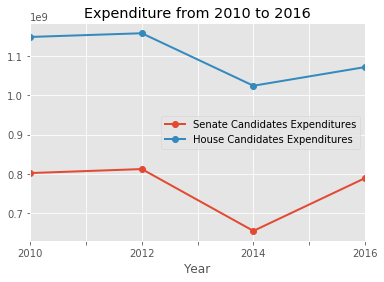

In [23]:
#Taking Election Year and Expenditure with respect to house transfer to another frame
all_dis_amo_dict_h = {all_house_senate_2010['ele_yea'].unique()[0].astype(str) : all_house_senate_2010.groupby('can_off')['Expenditure'].sum()['H'],
                    all_house_senate_2012['ele_yea'].unique()[0].astype(str) : all_house_senate_2012.groupby('can_off')['Expenditure'].sum()['H'],
                    all_house_senate_2014['ele_yea'].unique()[0].astype(str) : all_house_senate_2014.groupby('can_off')['Expenditure'].sum()['H'],
                    all_house_senate_2016['ele_yea'].unique()[0].astype(str) : all_house_senate_2016.groupby('can_off')['Expenditure'].sum()['H']}
all_dis_amo_df_h = pd.Series(all_dis_amo_dict_h, name='House Candidates Expenditures')
all_dis_amo_df_h.index.name = 'Year'
all_dis_amo_df_h.reset_index()

#Taking Election Year and Expenditure with respect to house transfer to another frame
all_dis_amo_dict_s = {all_house_senate_2010['ele_yea'].unique()[0].astype(str) : all_house_senate_2010.groupby('can_off')['Expenditure'].sum()['S'],
                    all_house_senate_2012['ele_yea'].unique()[0].astype(str) : all_house_senate_2012.groupby('can_off')['Expenditure'].sum()['S'],
                    all_house_senate_2014['ele_yea'].unique()[0].astype(str) : all_house_senate_2014.groupby('can_off')['Expenditure'].sum()['S'],
                    all_house_senate_2016['ele_yea'].unique()[0].astype(str) : all_house_senate_2016.groupby('can_off')['Expenditure'].sum()['S']}
all_dis_amo_df_s = pd.Series(all_dis_amo_dict_s, name='Senate Candidates Expenditures')
all_dis_amo_df_s.index.name = 'Year'
all_dis_amo_df_s.reset_index()

#Combining the house and senate details in one dataframe
all_dis_amo_df_s_h = pd.concat([all_dis_amo_df_s, all_dis_amo_df_h],join='inner',axis=1)

fig=all_dis_amo_df_s_h.plot.line(y=['Senate Candidates Expenditures','House Candidates Expenditures'],linewidth=2.0,marker ='o',title="Expenditure from 2010 to 2016")

Details about 2010 expenditure statewise and Top 10 Candidates spends(Both House and Senate) 

In [24]:
#Setting the colorScale for the map 
scl = [[0.0, 'rgb(255,255,255)'],[0.2, 'rgb(0,214,0)'],[0.4, 'rgb(0,172,0)'],
            [0.6, 'rgb(0,129,0)'],[0.8, 'rgb(0,86,0)'],[1.0, 'rgb(0,43,0)']]

#Creating simple dataframe from large dataset
states_df = pd.DataFrame()
states_df['State'] = dict(all_house_senate_2010.groupby("State")['Expenditure'].sum()).keys()
states_df['Expenditures'] = dict(all_house_senate_2010.groupby("State")['Expenditure'].sum()).values()

#Code for Chloropleth Map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_df['State'],
        z =states_df['Expenditures'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        )]
layout = dict(
        title = '2010 Candidate Expenditure by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map')

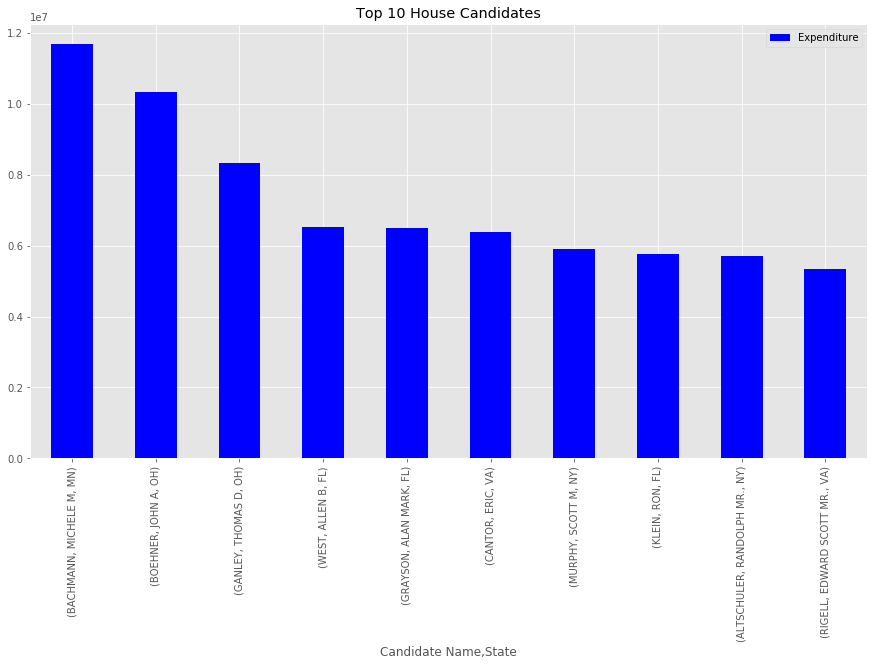

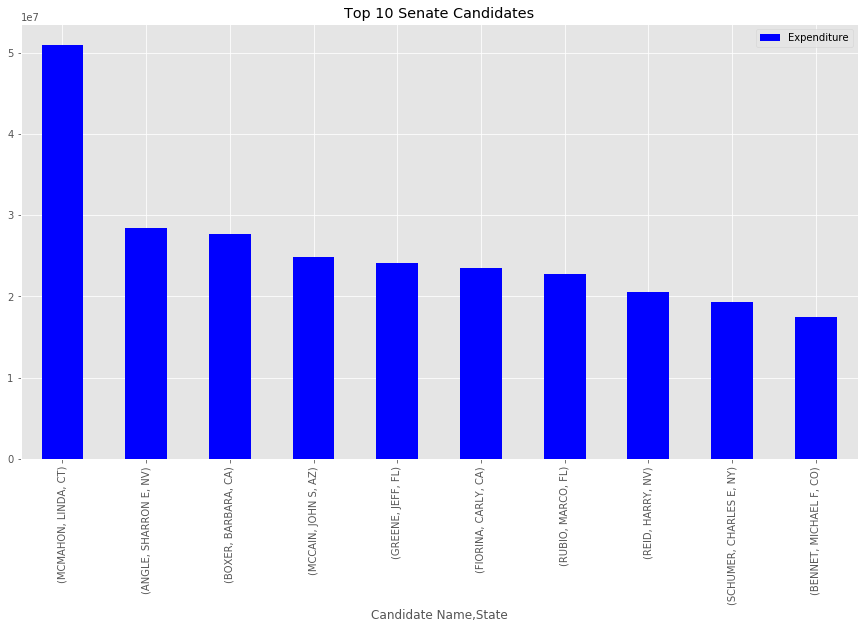

In [25]:
#Let us see the 2010 Expenditures by Senates and House
fig=all_house_senate_2010[all_house_senate_2010['can_off']=='H'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 House Candidates",color='blue')
fig.figure.set_size_inches(15,8)
fig=all_house_senate_2010[all_house_senate_2010['can_off']=='S'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 Senate Candidates",color='blue')
fig.figure.set_size_inches(15,8)

Details about 2012 expenditure statewise and Top 10 Candidates spends(Both House and Senate)

In [26]:
#Creating simple dataframe from large dataset
states_df = pd.DataFrame()
states_df['State'] = dict(all_house_senate_2012.groupby("State")['Expenditure'].sum()).keys()
states_df['Expenditures'] = dict(all_house_senate_2012.groupby("State")['Expenditure'].sum()).values()

#Code for Chloropleth Map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_df['State'],
        z =states_df['Expenditures'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        )]
layout = dict(
        title = '2012 Candidate Expenditure by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map')

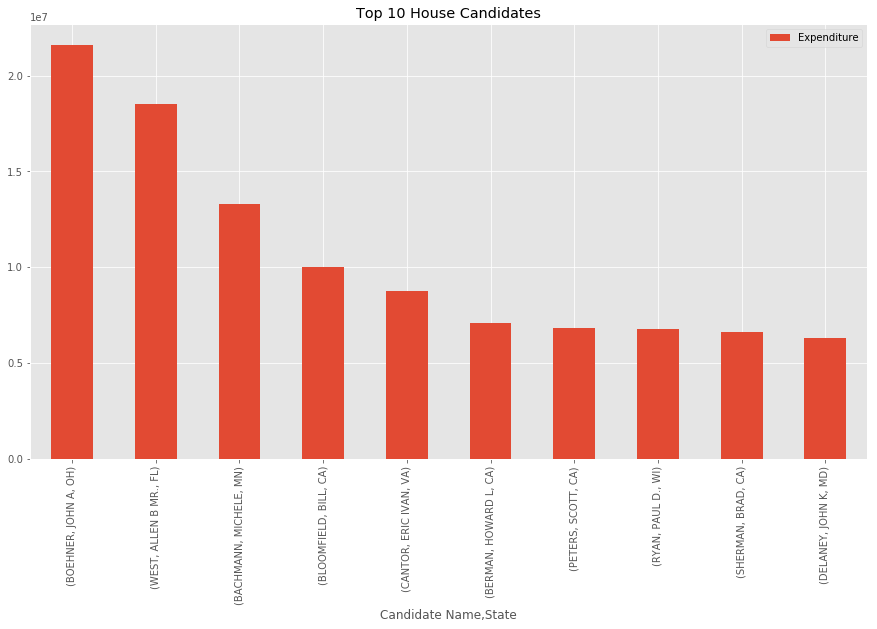

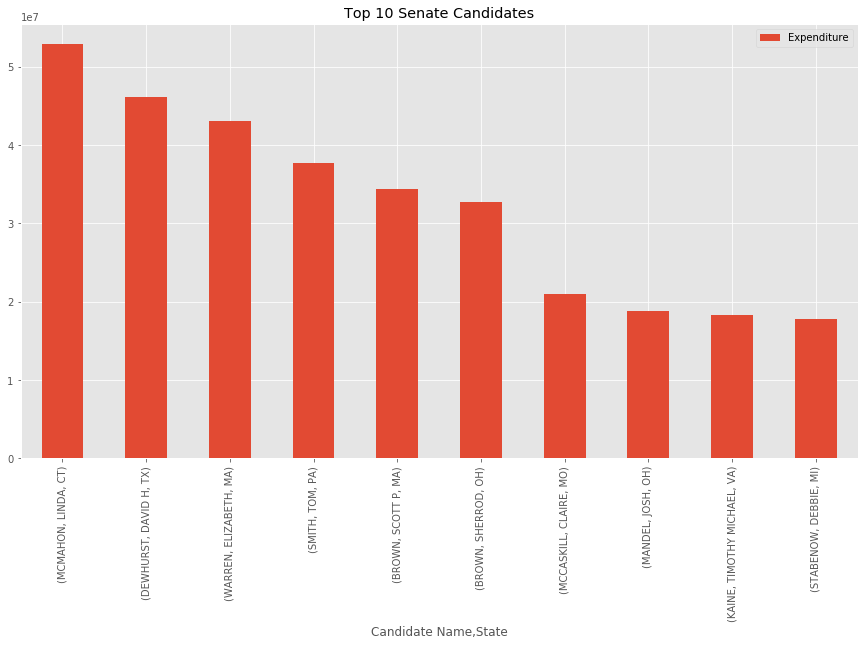

In [27]:
#Let us see the 2012 Expenditures by Senates and House
fig=all_house_senate_2012[all_house_senate_2012['can_off']=='H'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 House Candidates",)
fig.figure.set_size_inches(15,8)
fig=all_house_senate_2012[all_house_senate_2012['can_off']=='S'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 Senate Candidates")
fig.figure.set_size_inches(15,8)

Details about 2014 expenditure statewise and Top 10 Candidates spends(Both House and Senate)

In [28]:
#Creating simple dataframe from large dataset
states_df = pd.DataFrame()
states_df['State'] = dict(all_house_senate_2014.groupby("State")['Expenditure'].sum()).keys()
states_df['Expenditures'] = dict(all_house_senate_2014.groupby("State")['Expenditure'].sum()).values()

#Code for Chloropleth Map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_df['State'],
        z =states_df['Expenditures'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        )]
layout = dict(
        title = '2014 Candidate Expenditure by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map')

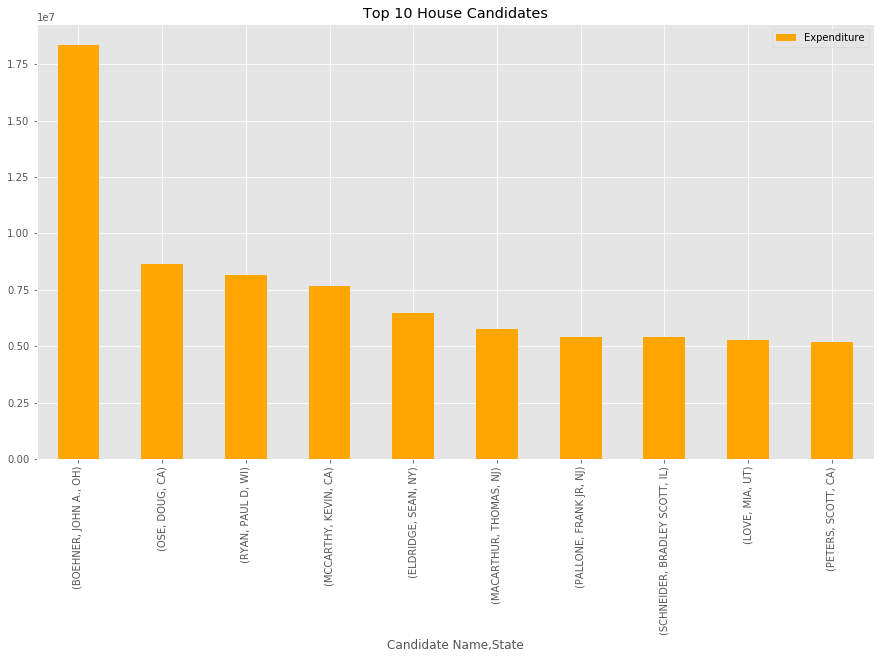

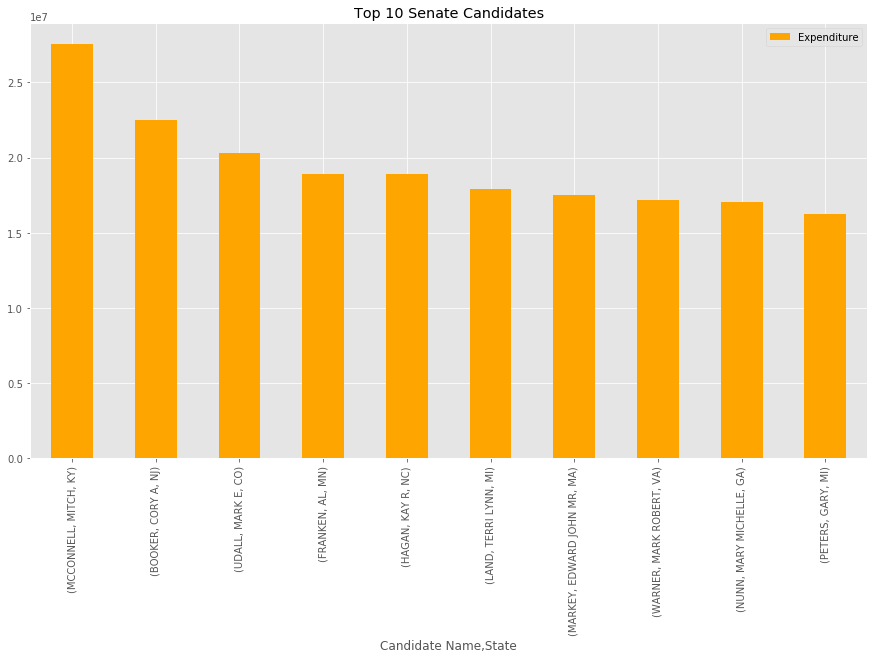

In [29]:
#Let us see the 2014 Expenditures by Senates and House
fig=all_house_senate_2014[all_house_senate_2014['can_off']=='H'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 House Candidates",color='orange')
fig.figure.set_size_inches(15,8)
fig=all_house_senate_2014[all_house_senate_2014['can_off']=='S'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 Senate Candidates",color='orange')
fig.figure.set_size_inches(15,8)

Details about 2016 expenditure statewise and Top 10 Candidates spends(Both House and Senate)

In [30]:
#Creating simple dataframe from large dataset
states_df = pd.DataFrame()
states_df['State'] = dict(all_house_senate_2016.groupby("State")['Expenditure'].sum()).keys()
states_df['Expenditures'] = dict(all_house_senate_2016.groupby("State")['Expenditure'].sum()).values()

#Code for Chloropleth Map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_df['State'],
        z =states_df['Expenditures'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        )]
layout = dict(
        title = '2016 Candidate Expenditure by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map')

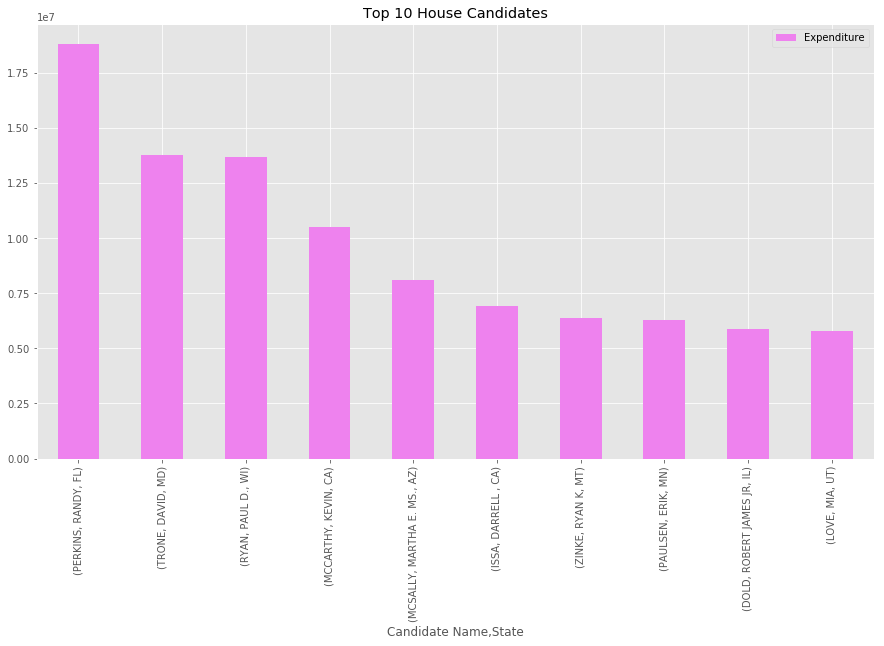

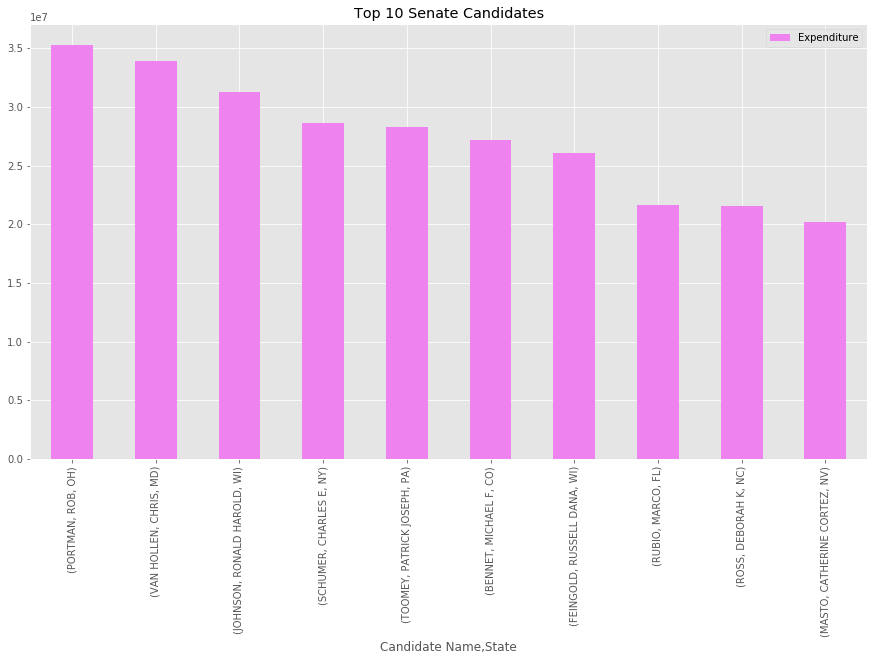

In [31]:
#Let us see the 2016 Expenditures by Senates and House
fig=all_house_senate_2016[all_house_senate_2016['can_off']=='H'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 House Candidates",color='Violet')
fig.figure.set_size_inches(15,8)
fig=all_house_senate_2016[all_house_senate_2016['can_off']=='S'].groupby(["Candidate Name","State"]).sum().sort_values(['Expenditure'], ascending=0).head(10).plot.bar(y='Expenditure',title= "Top 10 Senate Candidates",color='Violet')
fig.figure.set_size_inches(15,8)

Now we have seen top 10 spendthrift candidates and  States. Where are these people investing or spending on? 

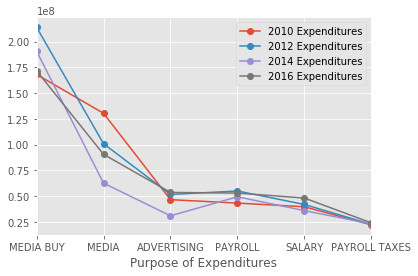

In [32]:
#Collecting all year Expenditures
df2016 = pd.DataFrame()
df2016['Purpose of Expenditures'] = dict(dict(all_house_senate_2016.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).keys()).keys()
df2016['2016 Expenditures'] = dict(all_house_senate_2016.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).values()

df2014 = pd.DataFrame()
df2014['Purpose of Expenditures'] = dict(dict(all_house_senate_2014.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).keys()).keys()
df2014['2014 Expenditures'] = dict(all_house_senate_2014.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).values()

df2012 = pd.DataFrame()
df2012['Purpose of Expenditures'] = dict(dict(all_house_senate_2012.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).keys()).keys()
df2012['2012 Expenditures'] = dict(all_house_senate_2012.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).values()

df2010 = pd.DataFrame()
df2010['Purpose of Expenditures'] = dict(dict(all_house_senate_2010.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).keys()).keys()
df2010['2010 Expenditures'] = dict(all_house_senate_2010.groupby(["dis_pur_des","ele_yea"]).sum().sort_values(['Expenditure'], ascending=0).head(10)["Expenditure"]).values()

all_PoE_Exp_df=df2010.merge(df2012,on='Purpose of Expenditures',how='inner').merge(df2014,on='Purpose of Expenditures',how='inner').merge(df2016,on='Purpose of Expenditures',how='inner')

fig= all_PoE_Exp_df.plot.line(x='Purpose of Expenditures' ,y=['2010 Expenditures','2012 Expenditures','2014 Expenditures','2016 Expenditures'],marker='o')

From this vizualiztions, We come to conclude that Media Buy(Research about target audience & marketing strategy) is one of prime purpose for maximum expenditure by any candidate.